In [151]:
import pandas as pd
import astropy
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import plotly
import plotly.express as px
import astropy.units as u


In [152]:
header = ['HR', 'Name', 'HH', 'MM', 'SS', '+/-', 'DEd', 'DEm', 'DEs', 'Sptype', 'n_parallax', 'Parallax', 'radial_velocity','NoteFlag', '']
def stripped(df):
    return df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

df = pd.read_csv('bsc5.csv', index_col=0, names = header)

df['HH'] = df['HH'].replace('  ', pd.NA)
df['MM'] = df['MM'].replace('  ', pd.NA)
df['SS'] = df['SS'].replace('  ', pd.NA)
df['DEd'] = df['DEd'].replace('  ', pd.NA)
df['DEm'] = df['DEm'].replace('  ', pd.NA)
df['DEs'] = df['DEs'].replace('  ', pd.NA)


df = stripped(df)


df['HH'] = pd.to_numeric(df['HH'], errors='coerce')
df['MM'] = pd.to_numeric(df['MM'], errors='coerce')
df['SS'] = pd.to_numeric(df['SS'], errors='coerce')

df['DEd'] = pd.to_numeric(df['DEd'], errors='coerce')
df['DEm'] = pd.to_numeric(df['DEm'], errors='coerce')
df['DEs'] = pd.to_numeric(df['DEs'], errors='coerce')
df['Parallax'] = pd.to_numeric(df['Parallax'], errors='coerce')




df['ra'] = ((df['HH']) + (df['MM']/60) + (df['SS']/3600)) *15


def Dec(line):
    if line['+/-'] == '-':
        return ((line['DEd'] + line['DEm']/60 + line['DEs']/3600)*(-1))
    else:
        return (line['DEd'] + line['DEm']/60 + line['DEs']/3600)
    
df['dec'] = df.apply(Dec, axis = 1)








In [153]:
df.head()

,Name,HH,MM,SS,+/-,DEd,DEm,DEs,Sptype,n_parallax,Parallax,radial_velocity,NoteFlag,,ra,dec
HR,,,,,,,,,,,,,,,,
1,,0.0,5.0,9.9,+,45.0,13.0,45.0,A1Vn,,NaN,-018,NaN,NaN,1.291250,45.229167
2,,0.0,5.0,3.8,-,0.0,30.0,11.0,gG9,,NaN,+014,NaN,NaN,1.265833,-0.503056
3,33 Psc,0.0,5.0,20.1,-,5.0,42.0,27.0,K0IIIbCN-0.5,,0.014,-006,*,NaN,1.333750,-5.707500
4,86 Peg,0.0,5.0,42.0,+,13.0,23.0,46.0,G5III,,NaN,-002,NaN,NaN,1.425000,13.396111
5,,0.0,6.0,16.0,+,58.0,26.0,12.0,G5V,,0.047,-012,*,NaN,1.566667,58.436667


In [154]:
df.dropna(subset=['Parallax'], inplace=True)
df = df[df ['Parallax'] != 0]
df = df[df ['n_parallax'] != 'D']
df = df.reset_index()
df.head()

,HR,Name,HH,MM,SS,+/-,DEd,DEm,DEs,Sptype,n_parallax,Parallax,radial_velocity,NoteFlag,,ra,dec
0,3,33 Psc,0.0,5.0,20.1,-,5.0,42.0,27.0,K0IIIbCN-0.5,,0.014,-006,*,NaN,1.333750,-5.707500
1,5,,0.0,6.0,16.0,+,58.0,26.0,12.0,G5V,,0.047,-012,*,NaN,1.566667,58.436667
2,6,,0.0,6.0,19.0,-,49.0,4.0,30.0,G1IV,,0.050,+003,*,NaN,1.579167,-49.075000
3,8,,0.0,6.0,36.8,+,29.0,1.0,17.0,K0V,,0.067,-008,*,NaN,1.653333,29.021389
4,15,21Alp And,0.0,8.0,23.3,+,29.0,5.0,26.0,B8IVpMnHg,,0.032,-012,*,NaN,2.097083,29.090556


In [155]:
df['Distance']  = 1/df['Parallax']
df.head()
df.dtypes


HR                   int64
Name                object
HH                 float64
MM                 float64
SS                 float64
+/-                 object
DEd                float64
DEm                float64
DEs                float64
Sptype              object
n_parallax          object
Parallax           float64
radial_velocity     object
NoteFlag            object
                   float64
ra                 float64
dec                float64
Distance           float64
dtype: object

In [156]:
df['x'] = np.pi * np.cos(df['dec'])* np.cos(df['ra'])
df['y'] = np.pi * np.cos(df['dec'])* np.sin(df['ra'])
df['z'] = np.pi * np.cos(df['dec'])

df = df [df ['Distance'] > 0]
ra_values = df ['ra']. values * u.degree
dec_values = df ['dec']. values * u.degree
distance_values = df ['Distance'].values * u.parsec
c = SkyCoord(ra  = ra_values, dec = dec_values, distance = distance_values, frame ='icrs')
df['x'] = c.cartesian.x.value
df['y'] = c.cartesian.y.value
df['z'] = c.cartesian.z.value



df.head()



,HR,Name,HH,MM,SS,+/-,DEd,DEm,DEs,Sptype,...,Parallax,radial_velocity,NoteFlag,,ra,dec,Distance,x,y,z
0,3,33 Psc,0.0,5.0,20.1,-,5.0,42.0,27.0,K0IIIbCN-0.5,...,0.014,-006,*,NaN,1.333750,-5.707500,71.428571,71.055213,1.654345,-7.103572
1,5,,0.0,6.0,16.0,+,58.0,26.0,12.0,G5V,...,0.047,-012,*,NaN,1.566667,58.436667,21.276596,11.132874,0.304488,18.128981
2,6,,0.0,6.0,19.0,-,49.0,4.0,30.0,G1IV,...,0.050,+003,*,NaN,1.579167,-49.075000,20.000000,13.096435,0.361051,-15.111354
3,8,,0.0,6.0,36.8,+,29.0,1.0,17.0,K0V,...,0.067,-008,*,NaN,1.653333,29.021389,14.925373,13.045890,0.376558,7.240837
4,15,21Alp And,0.0,8.0,23.3,+,29.0,5.0,26.0,B8IVpMnHg,...,0.032,-012,*,NaN,2.097083,29.090556,31.250000,27.289598,0.999273,15.193480


In [157]:
def mapped(spectral):
    dict = {
    'O': 'violet',  # Violet or deep blue
    'B': 'mediumblue',  # Medium blue
    'A': 'lightblue',  # Light blue
    'F': 'green',  # Green
    'G': 'yellow',  # Yellow
    'K': 'orange',  # Orange
    'M': 'red'   # Red
    }
    
    if pd.isna(spectral) or not spectral.strip():
        return 'black'

    first_char = spectral.strip()[0].upper()
    
    return dict.get(first_char, 'black')


df ['StarColor'] = df ['Sptype'].apply(mapped)
StarColors = df['StarColor']

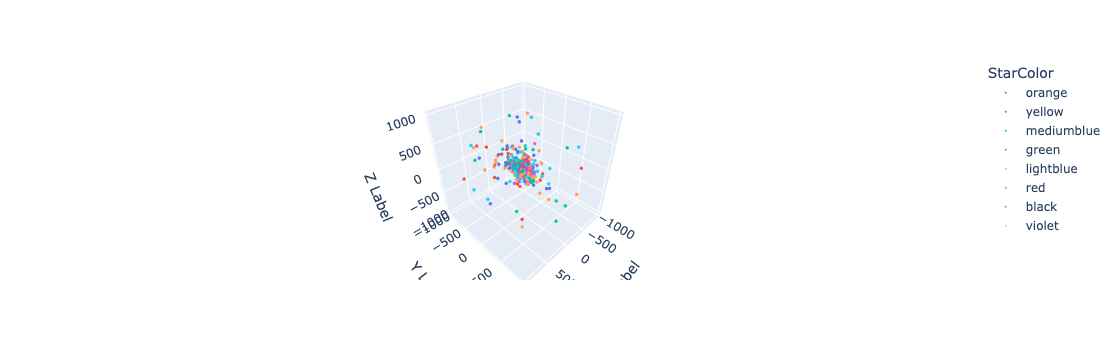

In [160]:


fig = px.scatter_3d(df, x='x', y='y', z='z', size_max=2, color = df['StarColor'], hover_data = [ 'HR', 'Distance', 'radial_velocity'])


fig. update_traces (marker = dict (size=2), selector = dict (mode= 'markers'))

fig.update_layout(scene=dict(xaxis_title='X Label',
                             yaxis_title='Y Label',
                             zaxis_title='Z Label'))

fig.show()